In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import PowerTransformer, StandardScaler
import seaborn as sns

****(SOLVE DTYPEWARNING) we set Low_memory=False because in this dataset columns have mixed dtypes.****
****This warning occures when using Pandas’ read_csv, it basically means you are loading in a CSV that has a column that consists out of multiple dtypes. For example: 1,5,a,b,c,3,2,a has a mix of strings and integers.****
****guesses which dtype a column has. However, by default, Pandas has the low_memory=True argument.****

In [2]:
df = pd.read_csv("NFLPlaybyPlay_2009-2016.csv", low_memory=False)
df.columns = df.columns.str.strip()
df = df.convert_dtypes().select_dtypes("number")
df.head(10)

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009091000,1,1,<NA>,15,3600,0,30,30,0,...,<NA>,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,<NA>,<NA>,2009
1,2009091000,1,1,1,15,3593,7,42,58,10,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009091000,1,1,2,15,3556,37,47,53,5,...,<NA>,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,<NA>,<NA>,2009
3,2009091000,1,1,3,14,3515,41,44,56,8,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009091000,1,1,4,14,3507,8,44,56,8,...,<NA>,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,<NA>,<NA>,2009
5,2009091000,2,1,1,14,3496,11,2,98,10,...,<NA>,0.558929,0.441071,0.578453,0.421547,0.441071,-0.019524,<NA>,<NA>,2009
6,2009091000,2,1,2,13,3460,36,2,98,10,...,0.163935,0.578453,0.421547,0.582881,0.417119,0.421547,-0.004427,-0.010456,0.006029,2009
7,2009091000,2,1,3,13,3431,29,6,94,6,...,<NA>,0.582881,0.417119,0.617544,0.382456,0.417119,-0.034663,<NA>,<NA>,2009
8,2009091000,2,1,4,12,3394,37,4,96,8,...,<NA>,0.617544,0.382456,0.591489,0.408511,0.382456,0.026054,<NA>,<NA>,2009
9,2009091000,3,1,1,12,3384,10,43,43,10,...,0.541602,0.591489,0.408511,0.585405,0.414595,0.591489,-0.006084,-0.024526,0.018442,2009


In [3]:
#using display.max_columns for showing all the columns
pd.set_option('display.max_columns', None)
df.head()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PassAttempt,AirYards,YardsAfterCatch,QBHit,InterceptionThrown,RushAttempt,Reception,FieldGoalDistance,Fumble,Sack,Challenge.Replay,Accepted.Penalty,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009091000,1,1,<NA>,15,3600,0,30,30,0,0,0,<NA>,1,39,0,0,0,0,0,0,0,0,0,0,0,<NA>,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.2137,0.003592,0.313676,0.0,0.0,0.323526,2.014474,<NA>,<NA>,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,<NA>,<NA>,2009
1,2009091000,1,1,1,15,3593,7,42,58,10,5,0,0,1,5,0,0,0,0,1,-3,8,0,0,0,1,<NA>,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.2937,0.003638,0.423011,0.0,0.0,2.338,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009091000,1,1,2,15,3556,37,47,53,5,2,0,0,1,-3,0,0,0,0,0,0,0,0,0,1,0,<NA>,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.40276,<NA>,<NA>,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,<NA>,<NA>,2009
3,2009091000,1,1,3,14,3515,41,44,56,8,2,0,0,1,0,0,0,0,0,1,34,0,0,0,0,0,<NA>,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009091000,1,1,4,14,3507,8,44,56,8,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,<NA>,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,0.001861,0.21348,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,<NA>,<NA>,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,<NA>,<NA>,2009


In [4]:
df.shape

(362447, 64)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362447 entries, 0 to 362446
Data columns (total 64 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   GameID                       362447 non-null  Int64  
 1   Drive                        362447 non-null  Int64  
 2   qtr                          362447 non-null  Int64  
 3   down                         308229 non-null  Int64  
 4   TimeUnder                    362447 non-null  Int64  
 5   TimeSecs                     362259 non-null  Int64  
 6   PlayTimeDiff                 362073 non-null  Int64  
 7   yrdln                        361724 non-null  Int64  
 8   yrdline100                   361724 non-null  Int64  
 9   ydstogo                      362447 non-null  Int64  
 10  ydsnet                       362447 non-null  Int64  
 11  GoalToGo                     361724 non-null  Int64  
 12  FirstDown                    336850 non-null  Int64  
 13 

In [6]:
df.isna()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PassAttempt,AirYards,YardsAfterCatch,QBHit,InterceptionThrown,RushAttempt,Reception,FieldGoalDistance,Fumble,Sack,Challenge.Replay,Accepted.Penalty,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362442,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
362443,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False
362444,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

### Missing values 

In [7]:
# Calculate the number of missing values in each column
missing_values = df.isna().sum()

# Convert to DataFrame for better formatting
missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['Column', 'Missing Values']

# Display the first 20 rows for inspection
print(missing_values_df.head(60))

# Save the results to a CSV file for complete inspection
missing_values_df.to_csv('missing_values_summary.csv', index=False)

                         Column  Missing Values
0                        GameID               0
1                         Drive               0
2                           qtr               0
3                          down           54218
4                     TimeUnder               0
5                      TimeSecs             188
6                  PlayTimeDiff             374
7                         yrdln             723
8                    yrdline100             723
9                       ydstogo               0
10                       ydsnet               0
11                     GoalToGo             723
12                    FirstDown           25597
13                PlayAttempted               0
14                 Yards.Gained               0
15                           sp               0
16                    Touchdown               0
17                       Safety               0
18                   Onsidekick               0
19                  PassAttempt         

### imputing

In [8]:
df.shape

(362447, 64)

In [9]:
mean_imputer = SimpleImputer(strategy='mean')
df_2 = mean_imputer.set_output(transform="pandas").fit_transform(df)
df_2.head()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PassAttempt,AirYards,YardsAfterCatch,QBHit,InterceptionThrown,RushAttempt,Reception,FieldGoalDistance,Fumble,Sack,Challenge.Replay,Accepted.Penalty,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.009091e+09,1.0,1.0,2.001226,15.0,3600.0,0.0,30.0,30.0,0.0,0.0,0.0,0.291183,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.379341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,0.526933,-0.386522,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.015209,-0.010492,2009.0
1,2.009091e+09,1.0,1.0,1.000000,15.0,3593.0,7.0,42.0,58.0,10.0,5.0,0.0,0.000000,1.0,5.0,0.0,0.0,0.0,0.0,1.0,-3.0,8.0,0.0,0.0,0.0,1.0,37.379341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009.0
2,2.009091e+09,1.0,1.0,2.000000,15.0,3556.0,37.0,47.0,53.0,5.0,2.0,0.0,0.000000,1.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37.379341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,0.526933,-0.386522,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.015209,-0.010492,2009.0
3,2.009091e+09,1.0,1.0,3.000000,14.0,3515.0,41.0,44.0,56.0,8.0,2.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,34.0,0.0,0.0,0.0,0.0,0.0,37.379341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009.0
4,2.009091e+09,1.0,1.0,4.000000,14.0,3507.0,8.0,44.0,56.0,8.0,2.0,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.379341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,0.526933,-0.386522,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.015209,-0.010492,2009.0


In [10]:
df_2.isna().sum()

GameID       0
Drive        0
qtr          0
down         0
TimeUnder    0
            ..
Win_Prob     0
WPA          0
airWPA       0
yacWPA       0
Season       0
Length: 64, dtype: int64

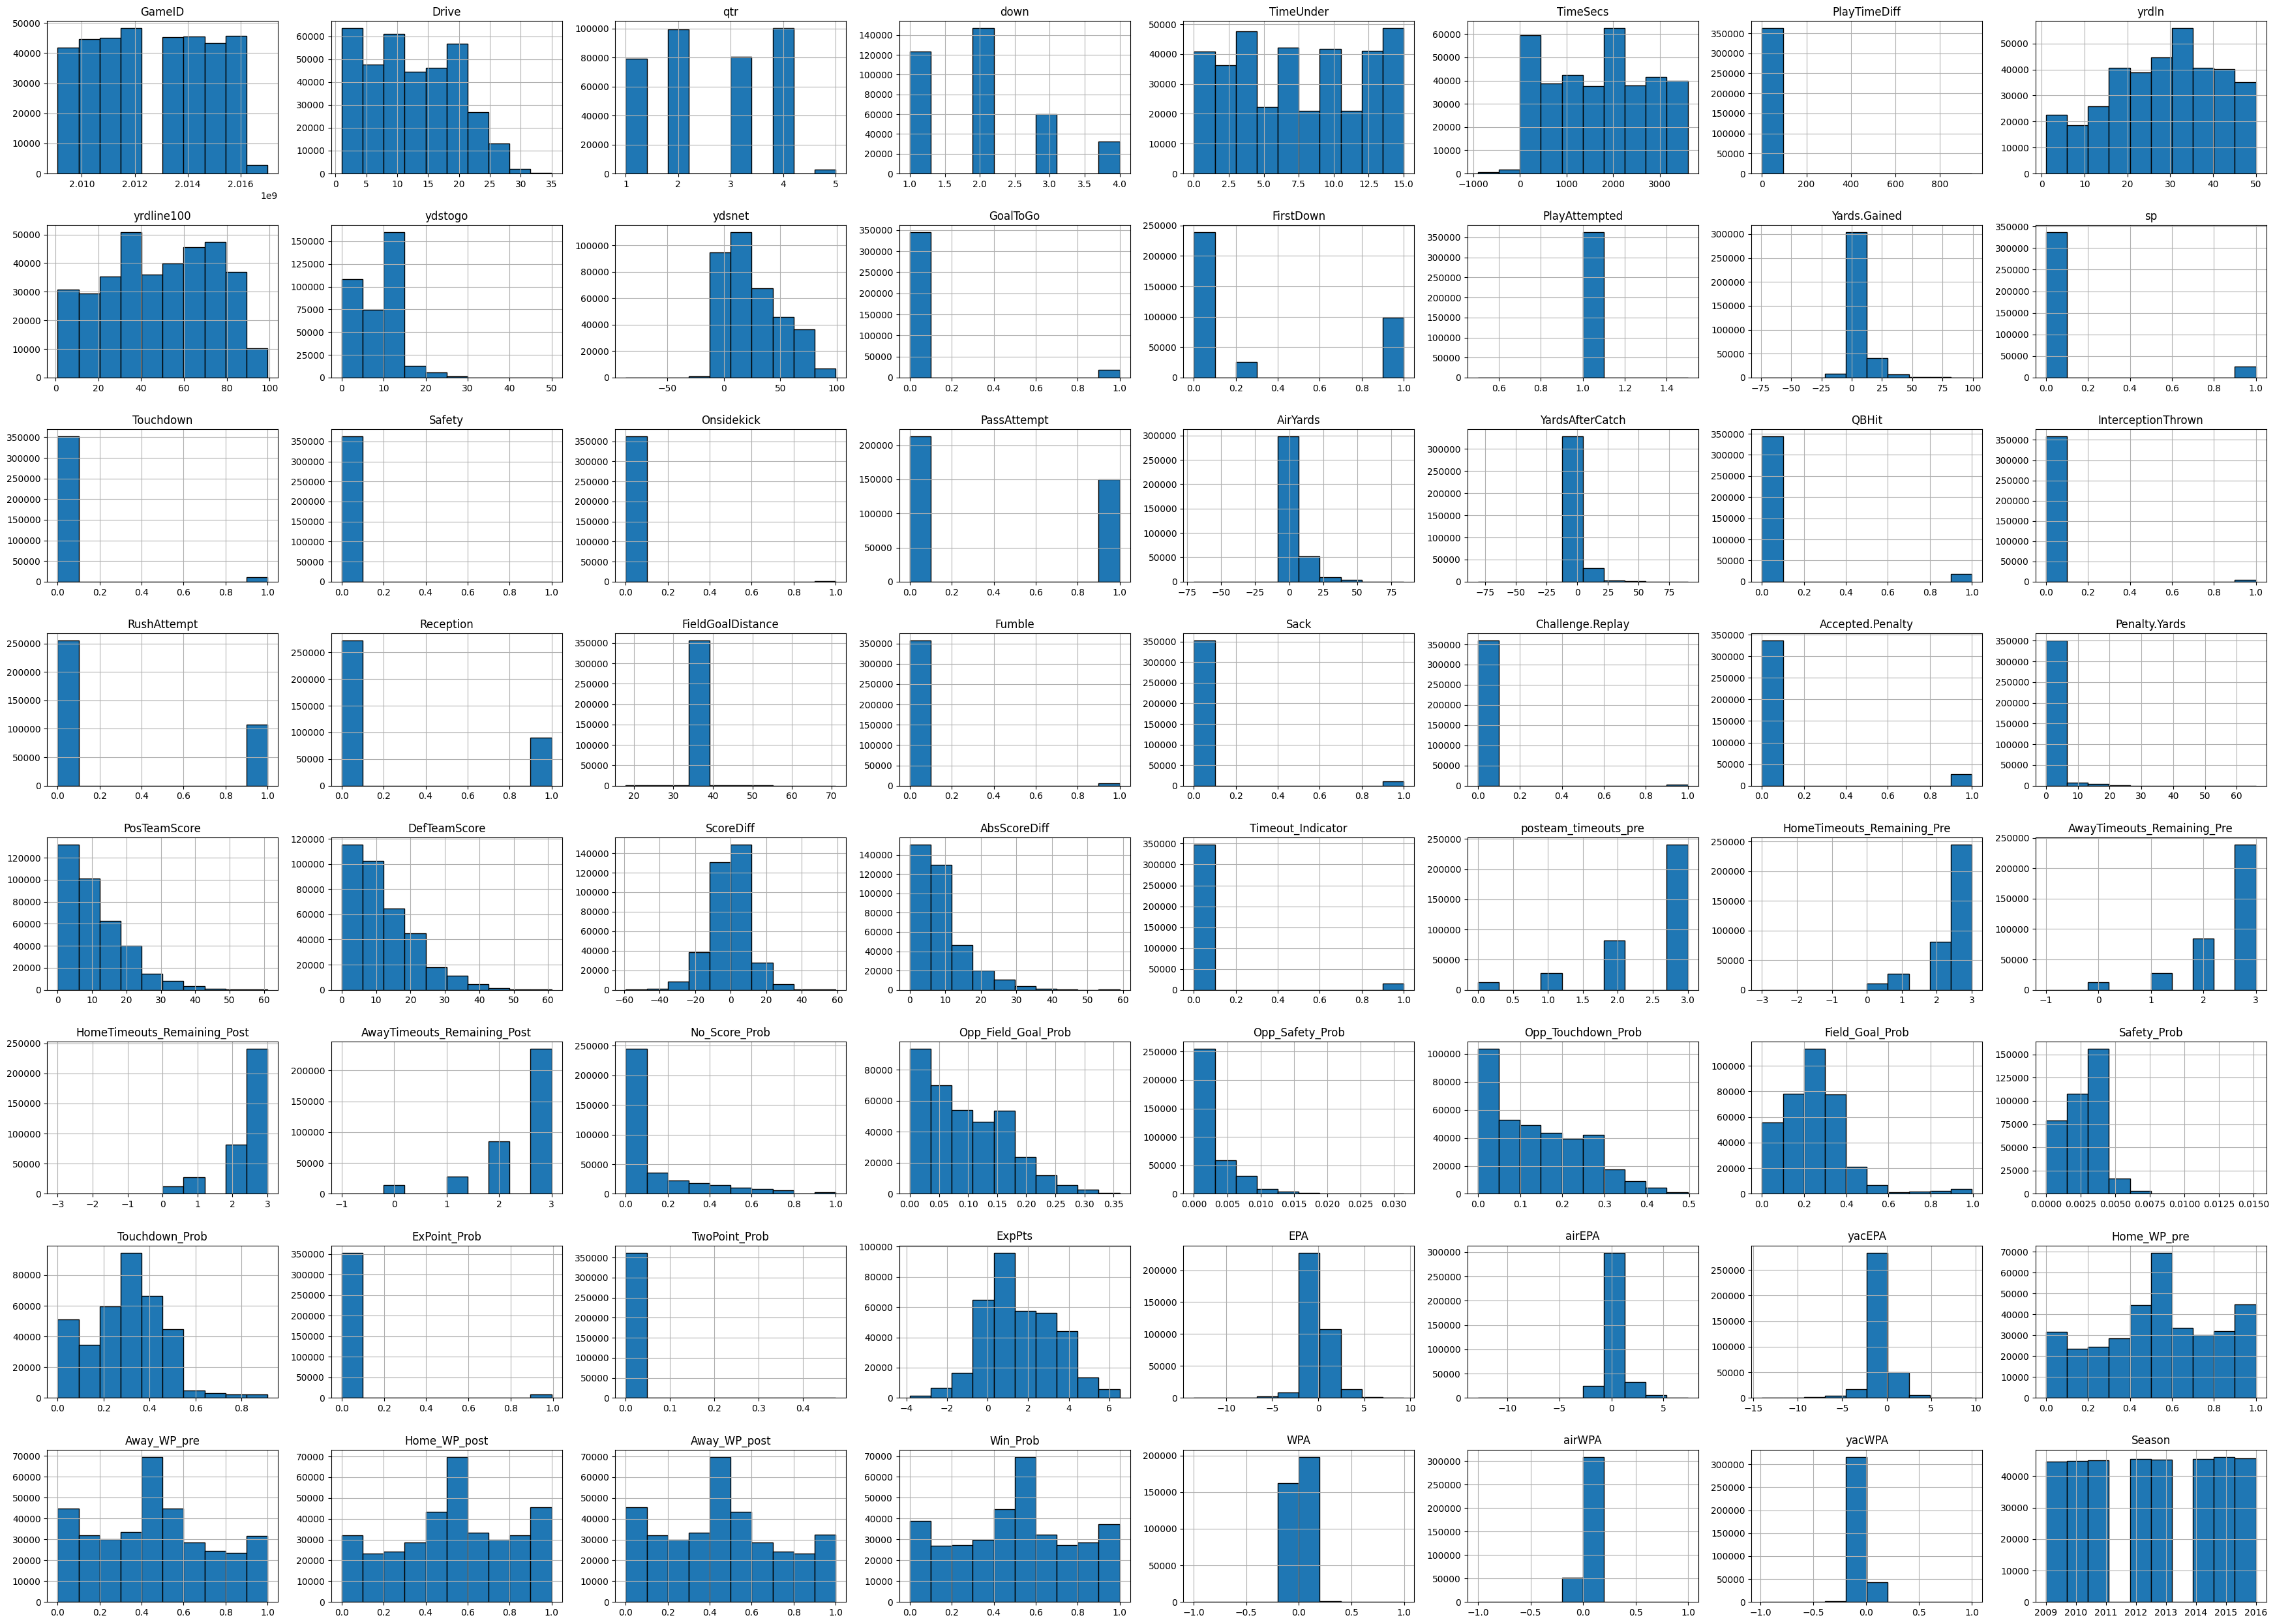

In [11]:
# Create histograms for visluaize the distribution of variables
df_2.hist(figsize=(35, 25), bins=10, edgecolor='black')

# Display the plots
plt.tight_layout()
plt.show()

### outliers capping

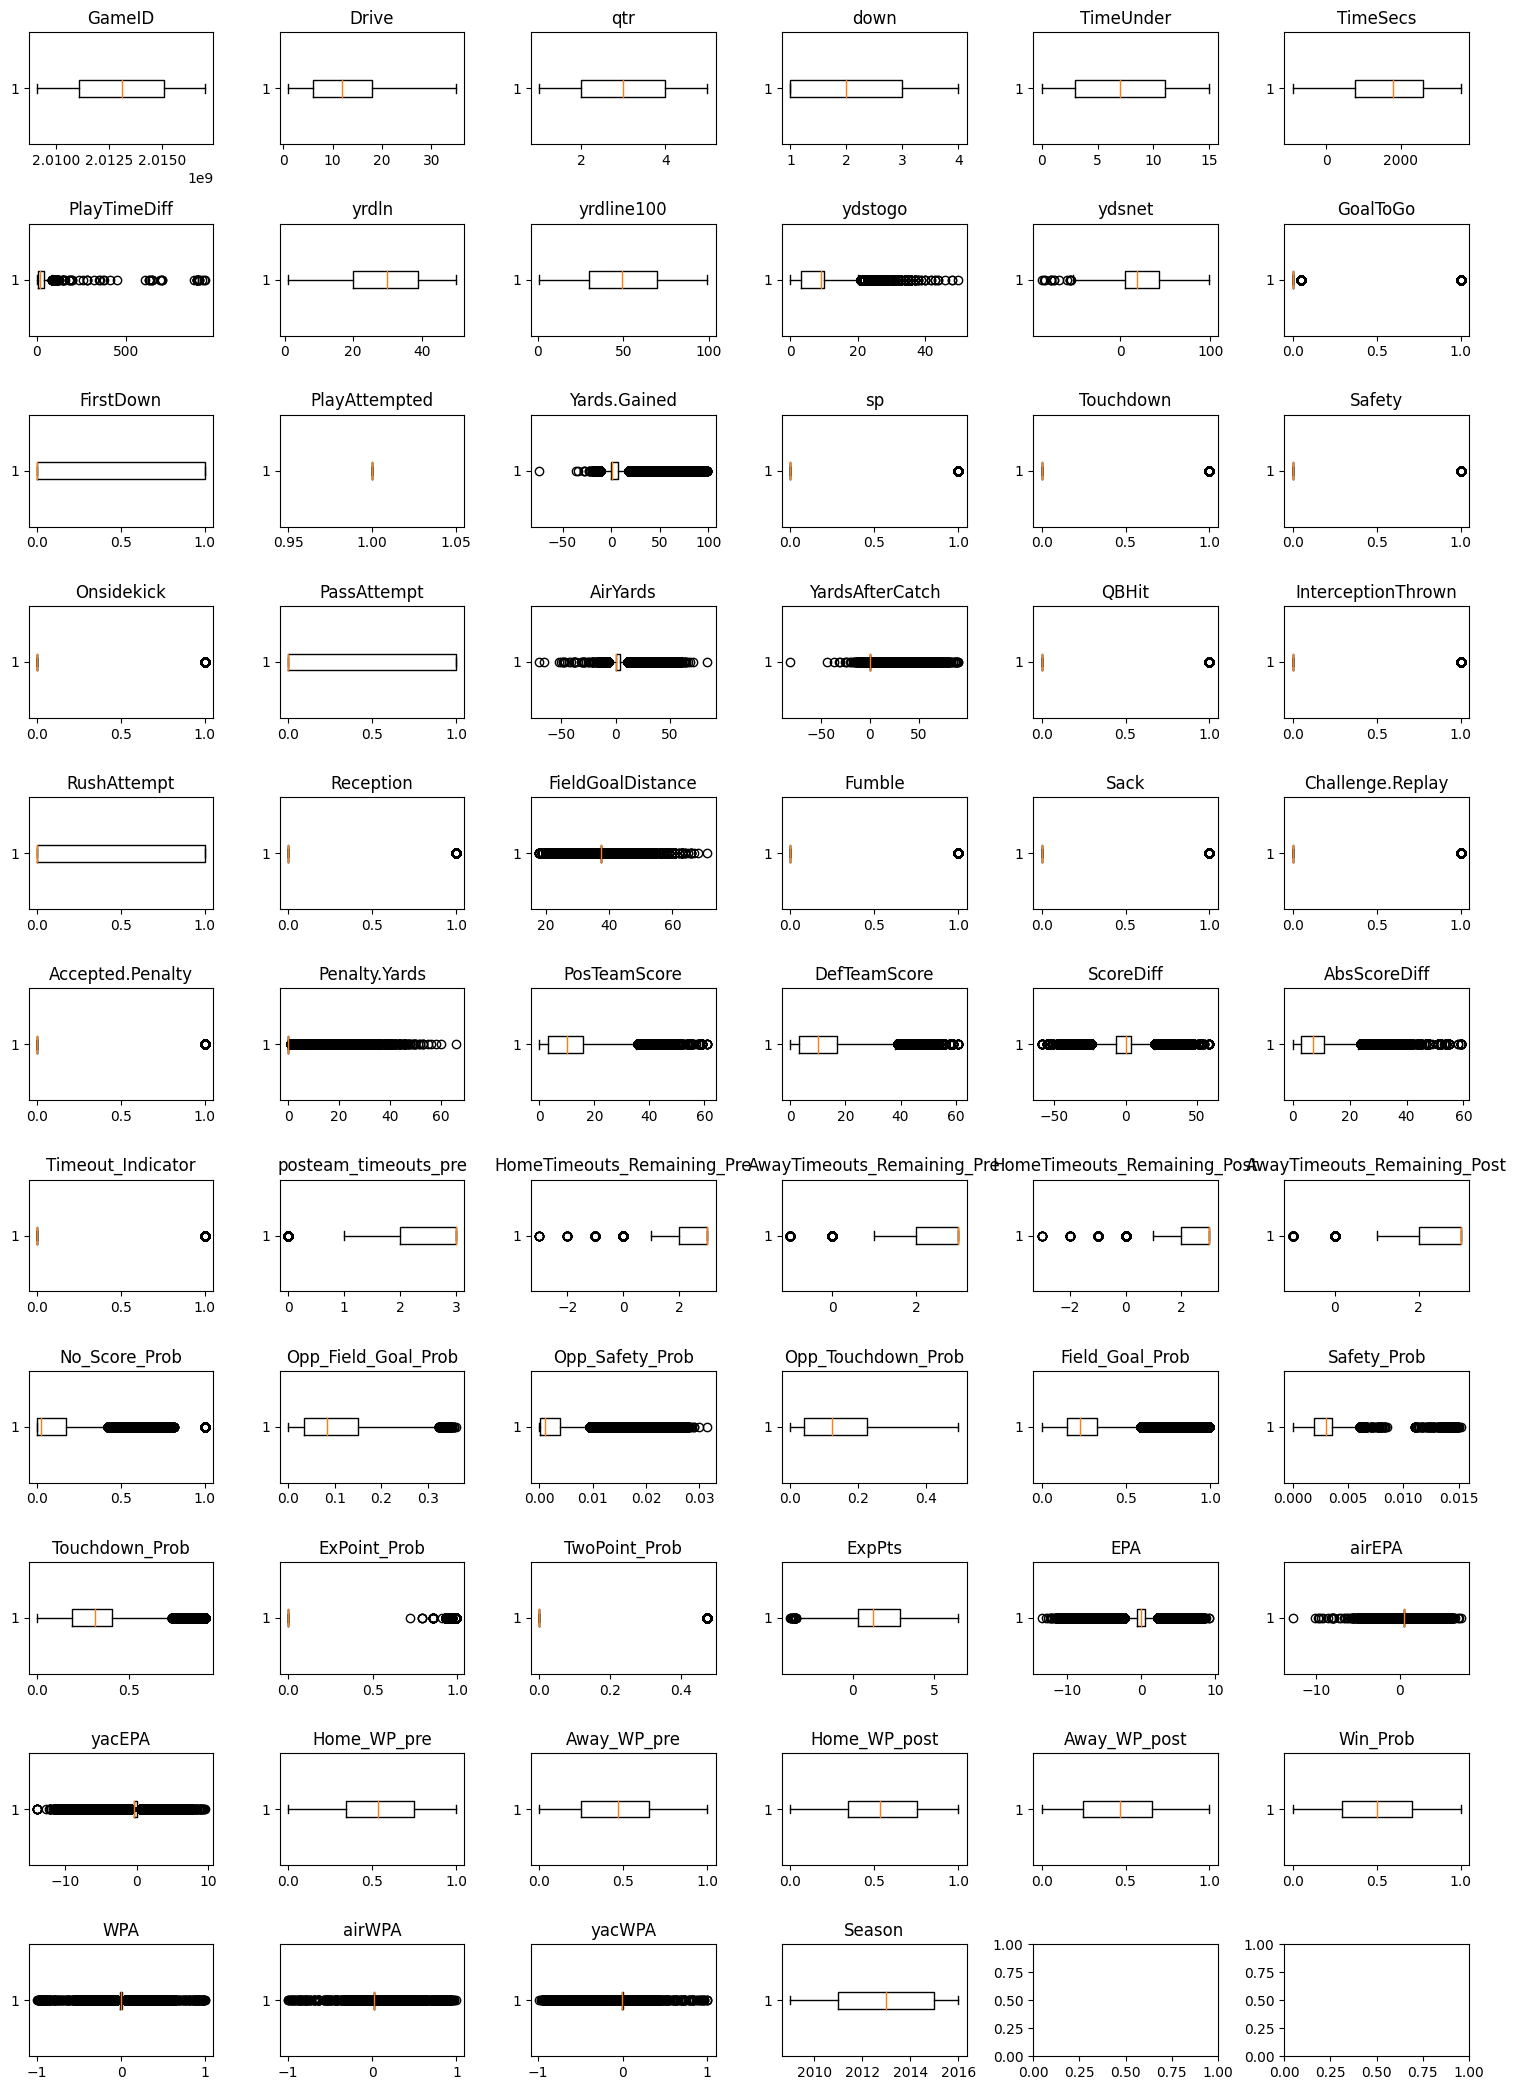

In [12]:
fig, axes = plt.subplots(11,6,figsize=(15,3*7), tight_layout=True)

for ax, col in zip(axes.flat, df_2.columns):
    
    ax.boxplot(df_2[col], vert=False)
    ax.set_title(col)
    
plt.show()

## Remove outliers 

In [20]:
# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1 = df_2.quantile(0.25)
Q3 = df_2.quantile(0.75)

# Step 2: Calculate the IQR for each column
IQR = Q3 - Q1

# Step 3: Define the bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter the dataset to remove outliers
df_no_outliers = df_2[~((df_2 < lower_bound) | (df_2 > upper_bound)).any(axis=1)]

df_no_outliers.head()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PassAttempt,AirYards,YardsAfterCatch,QBHit,InterceptionThrown,RushAttempt,Reception,FieldGoalDistance,Fumble,Sack,Challenge.Replay,Accepted.Penalty,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
2,2.009091e+09,1.0,1.0,2.0,15.0,3556.0,37.0,47.0,53.0,5.0,2.0,0.0,0.0,1.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37.379341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,0.526933,-0.386522,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.015209,-0.010492,2009.0
11,2.009091e+09,3.0,1.0,1.0,11.0,3321.0,27.0,30.0,30.0,10.0,12.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37.379341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,0.001305,0.046332,0.000083,0.071180,0.363390,0.002996,0.514713,0.0,0.0,4.061731,-0.542287,0.526933,-0.386522,0.615159,0.384841,0.597822,0.402178,0.615159,-0.017337,0.015209,-0.010492,2009.0
17,2.009091e+09,4.0,1.0,1.0,8.0,3144.0,33.0,22.0,22.0,10.0,70.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37.379341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,0.002055,0.035113,0.000039,0.053521,0.375591,0.002738,0.530943,0.0,0.0,4.368785,-0.234490,0.526933,-0.386522,0.368797,0.631203,0.376194,0.623806,0.631203,-0.007397,0.015209,-0.010492,2009.0
21,2.009091e+09,5.0,1.0,1.0,7.0,3104.0,4.0,27.0,73.0,10.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37.379341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,0.009629,0.151594,0.003642,0.232451,0.241638,0.003563,0.357484,0.0,0.0,1.145208,-0.593971,0.526933,-0.386522,0.528421,0.471579,0.511082,0.488918,0.528421,-0.017339,0.015209,-0.010492,2009.0
22,2.009091e+09,5.0,1.0,2.0,7.0,3069.0,35.0,28.0,72.0,9.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37.379341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,0.011256,0.171615,0.004378,0.263104,0.227868,0.003897,0.317882,0.0,0.0,0.551237,-0.632618,0.526933,-0.386522,0.511082,0.488918,0.491891,0.508109,0.511082,-0.019192,0.015209,-0.010492,2009.0


### boxplot removing outilers 

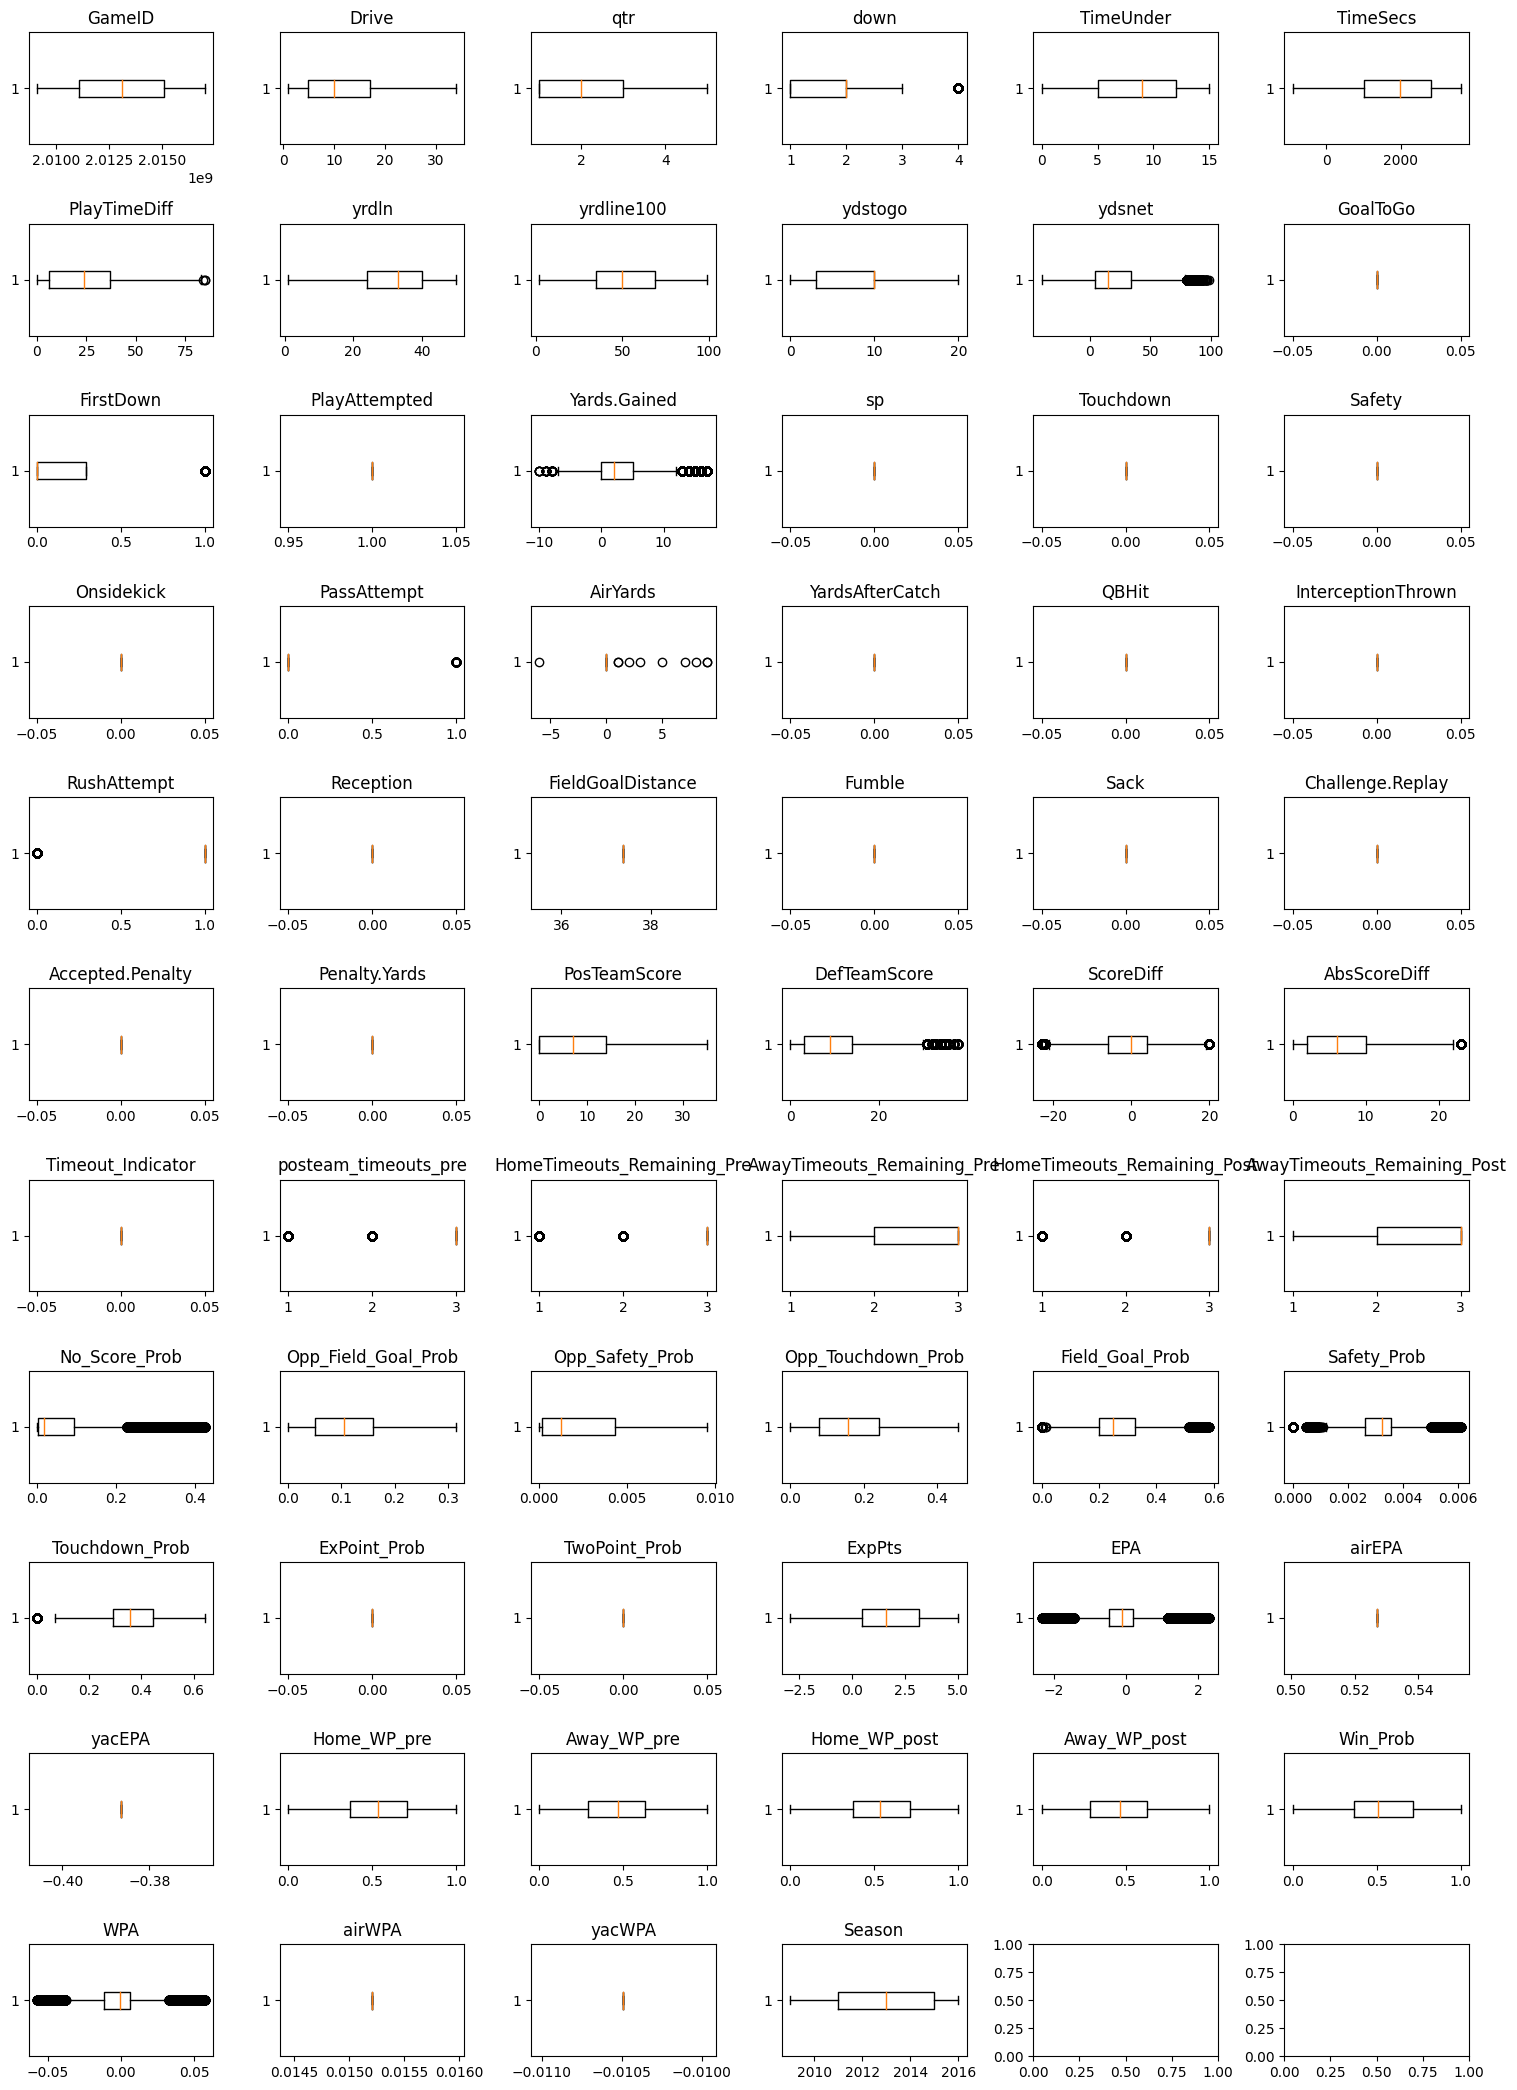

In [21]:
fig, axes = plt.subplots(11,6,figsize=(15,3*7), tight_layout=True)

for ax, col in zip(axes.flat, df_no_outliers.columns):
    
    ax.boxplot(df_no_outliers[col], vert=False)
    ax.set_title(col)
    
plt.show()

### Visualize the distribution of the variables after removing outliers  

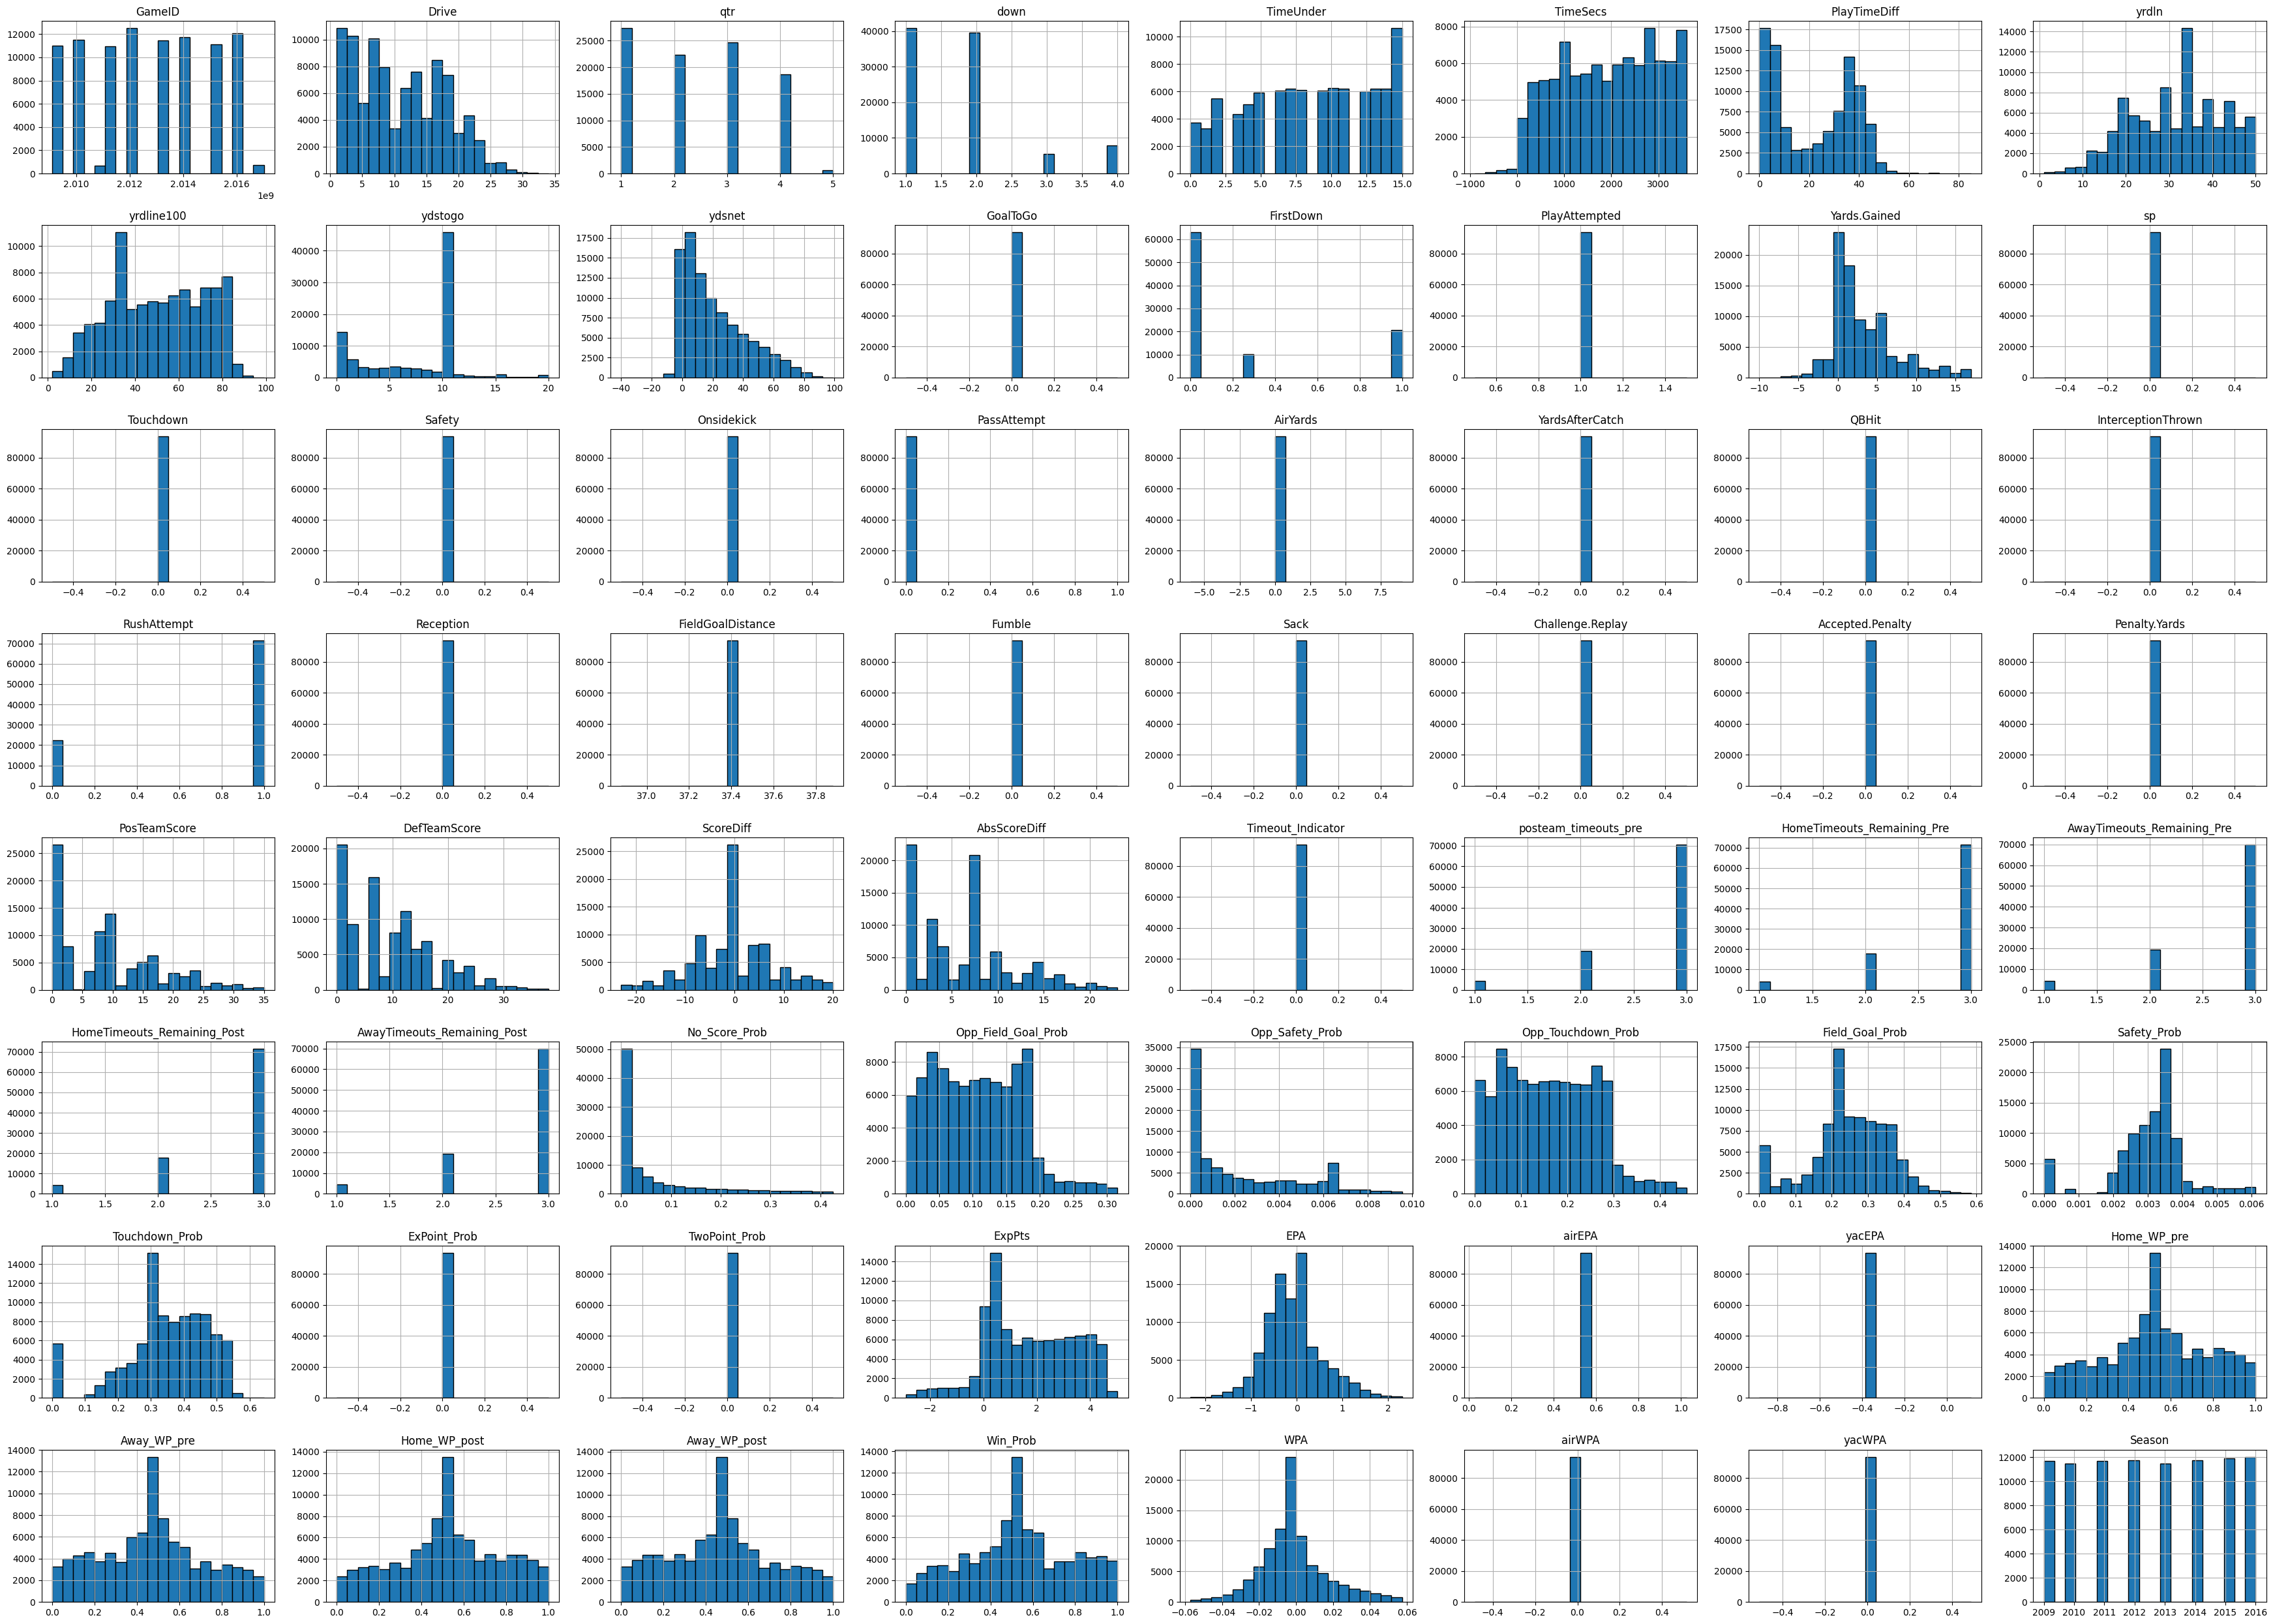

In [22]:
# Create histograms for visluaize the distribution of variables
df_no_outliers.hist(figsize=(35, 25), bins=20, edgecolor='black')

# Display the plots
plt.tight_layout()
plt.show()